In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import unittest
from image_process import *
import glob
import cv2
from os.path import join, split, splitext

In [6]:
dummy_img = cv2.imread('./camera_cal/calibration1.jpg')
img_size = get_cv2_img_size(dummy_img)
IMG_FOLDER = './camera_cal/calibration*.jpg'
NX = 9
NY = 6
camcal = CameraCalibrator(img_size, IMG_FOLDER, NX, NY)

In [44]:
test_image_file="./problematic_images/frame_0.5.jpg"

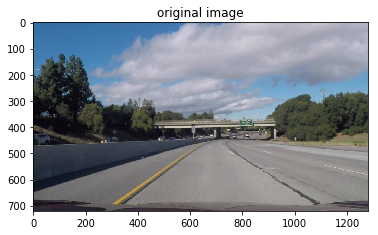

In [45]:
test_image = cv2.imread(test_image_file)
n_image = camcal.transform(test_image)
plt.imshow(np.flip(test_image, axis=2))
plt.title("original image")

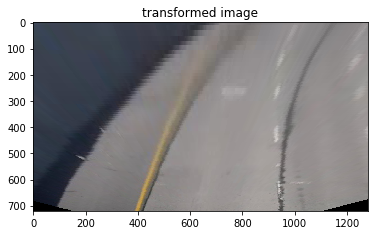

In [46]:
perspect_image = PerspectiveTransformer().transform(n_image)
plt.imshow(np.flip(perspect_image, axis=2))
plt.title("transformed image")

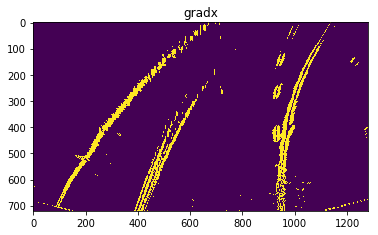

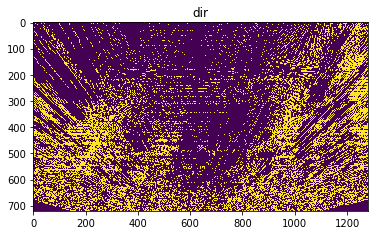

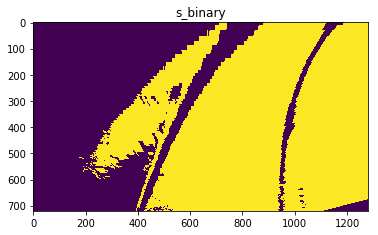

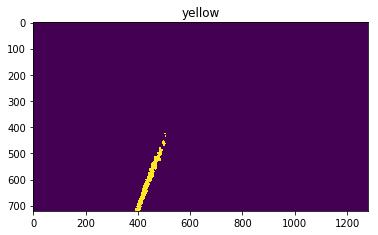

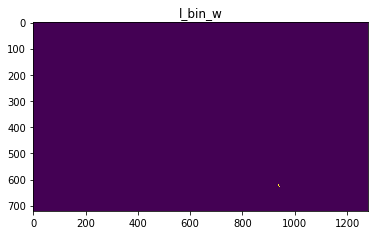

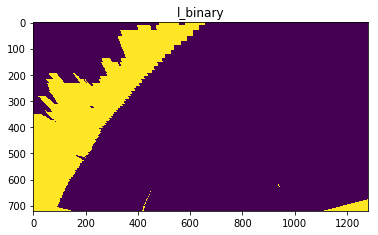

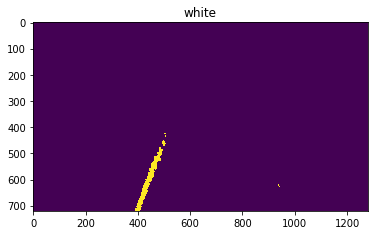

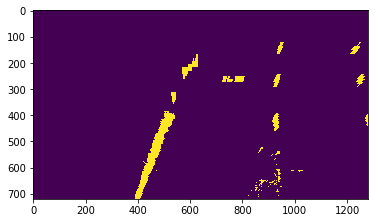

In [47]:
combined, img_comp = yellow_white_luv(perspect_image)

for img in img_comp.keys():
    plt.figure()
    plt.imshow(img_comp[img])
    plt.title(img)
    #plt.savefig("./output_images/demo_bin_%s.jpg" % img)

plt.imshow(combined)
#plt.savefig("./output_images/demo_bin_all.jpg")

pip = Pipeline([('cam', camcal),('pers', PerspectiveTransformer()) ,('undistort', EdgeExtractor())
                ])

n_image = pip.fit_transform(test_image)
plt.figure()
plt.imshow(n_image)

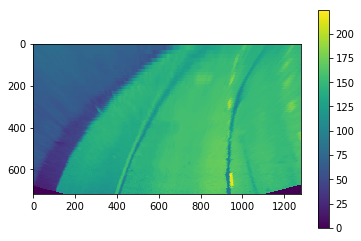

In [24]:
luv_img = cv2.cvtColor(perspect_image, cv2.COLOR_RGB2LUV)
plt.imshow(luv_img[:,:,0])
plt.colorbar()

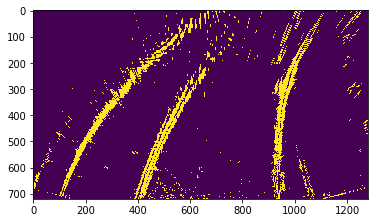

In [23]:
sobel_img=abs_sobel_thresh(luv_img[:,:,0], orient='x',sobel_kernel=5, thresh=(10, 80), to_gray=False)
plt.imshow(sobel_img)

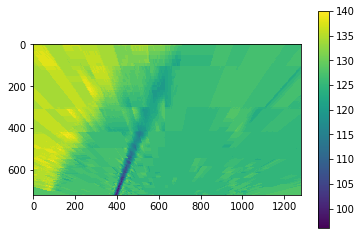

In [48]:
lab_img = cv2.cvtColor(perspect_image, cv2.COLOR_RGB2Lab)
plt.imshow(lab_img[:,:,2])
plt.colorbar()

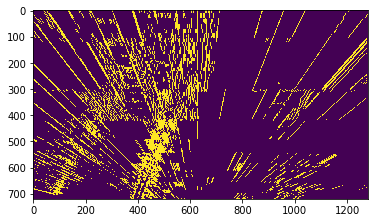

In [47]:
sobel_img=abs_sobel_thresh(lab_img[:,:,2], orient='x',sobel_kernel=9, thresh=(10, 80), to_gray=False)
plt.imshow(sobel_img)

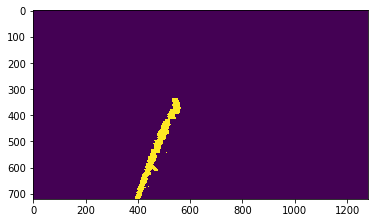

In [38]:
b_binary=channel_select(perspect_image, color_space='Lab', thresh=(0, 120), channel=2)
plt.imshow(b_binary)

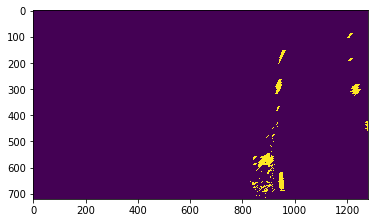

In [39]:
l_binary=channel_select(perspect_image, color_space='LUV', thresh=(170, 255), channel=0)
plt.imshow(l_binary)

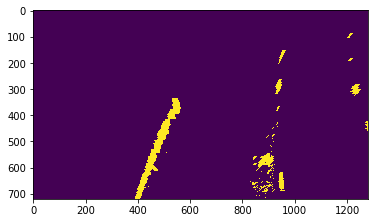

In [41]:
bl_binary=l_binary|b_binary
plt.imshow(bl_binary)

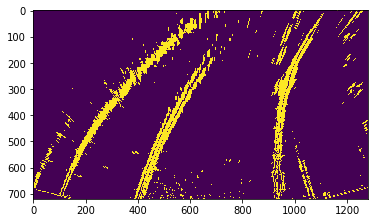

In [52]:
sobel_img=abs_sobel_thresh(luv_img[:,:,0], orient='x',sobel_kernel=9, thresh=(10, 80), to_gray=False)
plt.imshow(sobel_img)

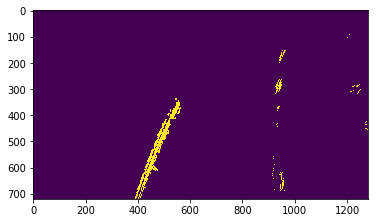

In [53]:
bl_binary=(l_binary|b_binary)&sobel_img
plt.imshow(bl_binary)